In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [2]:
df = pd.read_csv("C:/Users/selen/Clients-satisfaction-prediction/data/dataset.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
# Encodage binaire
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Variables catégorielles à encoder
cat_cols = df.select_dtypes(include='object').columns

# One-hot encoding
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)


In [18]:
# Encodage LabelEncoder
le = LabelEncoder()
df['target_encoded'] = le.fit_transform(df['Churn'])

# Encodage one-hot si plusieurs colonnes catégorielles
df = pd.get_dummies(df, drop_first=True)

# Séparation X et y
X = df.drop(['Churn', 'target_encoded'], axis=1)
y = df['target_encoded']

# Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


In [22]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)

print("Régression logistique")
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))
print("Accuracy:", accuracy_score(y_test, y_pred_log))


Régression logistique
[[591 444]
 [ 52 322]]
              precision    recall  f1-score   support

           0       0.92      0.57      0.70      1035
           1       0.42      0.86      0.56       374

    accuracy                           0.65      1409
   macro avg       0.67      0.72      0.63      1409
weighted avg       0.79      0.65      0.67      1409

Accuracy: 0.6479772888573456


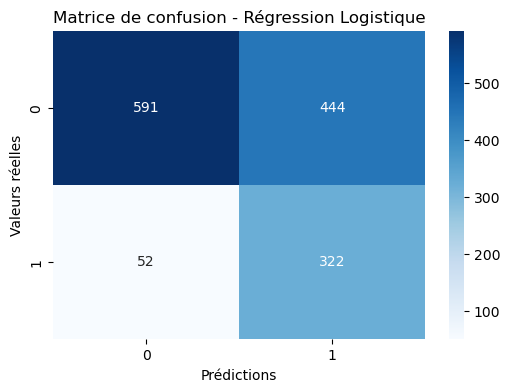

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Prédictions
y_pred_log = logreg.predict(X_test)

# Matrice de confusion
cm_log = confusion_matrix(y_test, y_pred_log)

# Affichage
plt.figure(figsize=(6, 4))
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de confusion - Régression Logistique")
plt.xlabel("Prédictions")
plt.ylabel("Valeurs réelles")
plt.show()


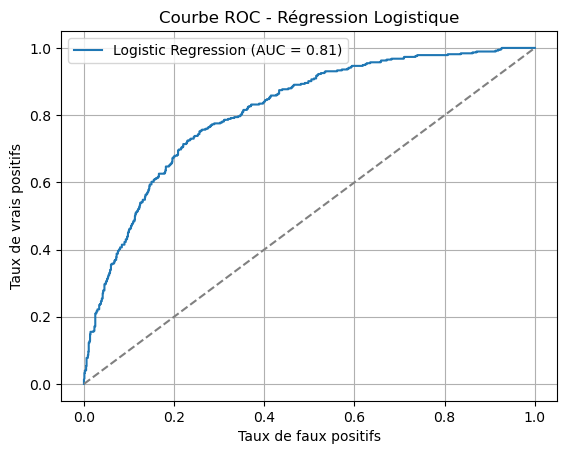

In [30]:
from sklearn.metrics import roc_curve, auc

y_score_log = logreg.predict_proba(X_test)[:, 1]
fpr_log, tpr_log, _ = roc_curve(y_test, y_score_log)
roc_auc_log = auc(fpr_log, tpr_log)

plt.figure()
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {roc_auc_log:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("Taux de faux positifs")
plt.ylabel("Taux de vrais positifs")
plt.title("Courbe ROC - Régression Logistique")
plt.legend()
plt.grid(True)
plt.show()


In [24]:
svm = SVC(kernel='rbf')  # ou 'linear', 'poly', etc.
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("SVM")
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))


SVM
[[1034    1]
 [ 367    7]]
              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1035
           1       0.88      0.02      0.04       374

    accuracy                           0.74      1409
   macro avg       0.81      0.51      0.44      1409
weighted avg       0.77      0.74      0.63      1409

Accuracy: 0.7388218594748048


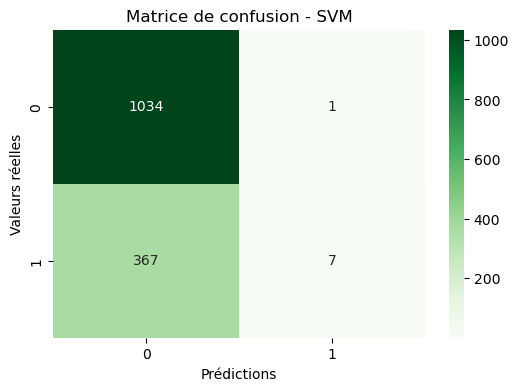

In [28]:
# Prédictions
y_pred_svm = svm.predict(X_test)

# Matrice de confusion
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Affichage
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Greens')
plt.title("Matrice de confusion - SVM")
plt.xlabel("Prédictions")
plt.ylabel("Valeurs réelles")
plt.show()


In [32]:
from sklearn.svm import SVC
svm = SVC(probability=True)  # Important !
svm.fit(X_train, y_train)


SVC(probability=True)